<a href="https://colab.research.google.com/github/teguhprastyopy/machine-learning/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # math operations 
import pandas as pd # data operations 
import seaborn as sns # display visualization 
import matplotlib.pyplot as plt # create chart or graph
%matplotlib inline

In [38]:
# read dataset from csv
df = pd.read_csv("dataset/cardata-germany-dataset.csv")

# display 5 top data
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [39]:
# check  data type of dataset
df.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [40]:
# view number of row and columns
df.shape

(46405, 9)

In [41]:
 duplicate_rows_df = df[df.duplicated()]
 print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (2140, 9)


In [42]:
df.count()

mileage      46405
make         46405
model        46262
fuel         46405
gear         46223
offerType    46405
price        46405
hp           46376
year         46405
dtype: int64

In [43]:
df = df.drop_duplicates()
df.shape

(44265, 9)

In [44]:
print(df.isnull().sum())

mileage        0
make           0
model        137
fuel           0
gear         175
offerType      0
price          0
hp            24
year           0
dtype: int64


In [47]:
df = df.dropna()
df.shape

(43947, 9)

In [48]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


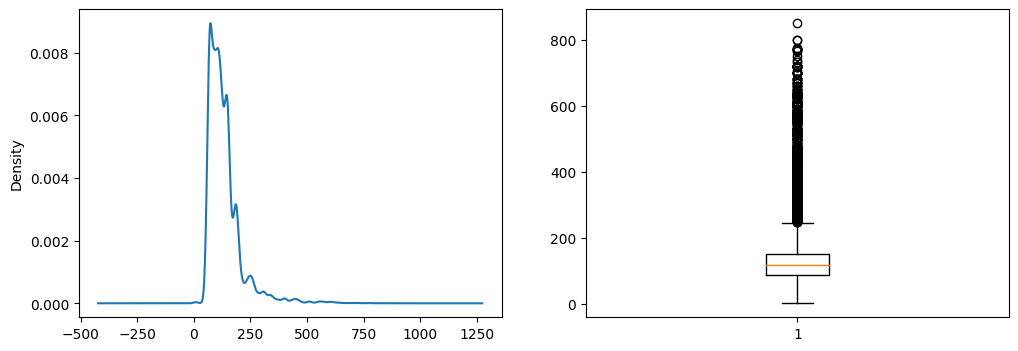

In [49]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['hp'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['hp'])
plt.show()

<Axes: xlabel='hp'>

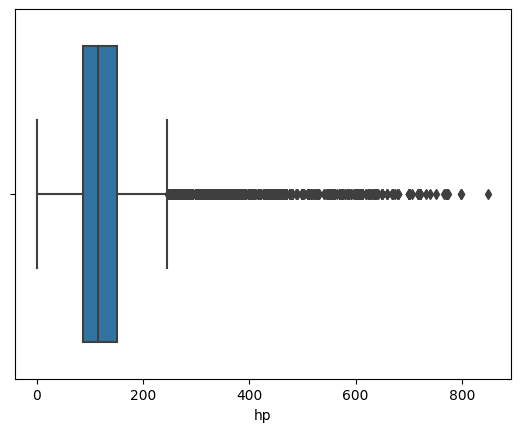

In [50]:
sns.boxplot(x=df['hp'])

In [53]:
df.price.describe()

count    4.394700e+04
mean     1.654656e+04
std      1.944680e+04
min      1.100000e+03
25%      7.490000e+03
50%      1.099000e+04
75%      1.949000e+04
max      1.199900e+06
Name: price, dtype: float64

<Axes: xlabel='price'>

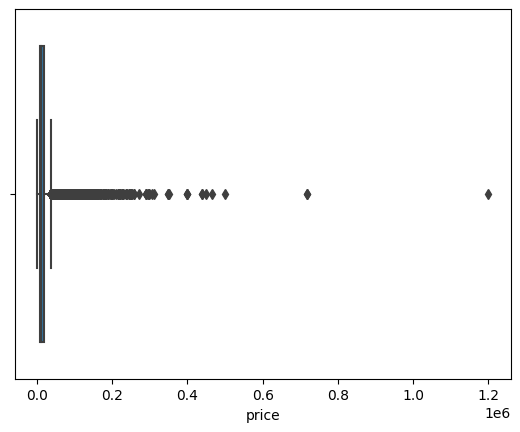

In [54]:
sns.boxplot(x=df['price'])

Text(0.5, 0, 'car names')

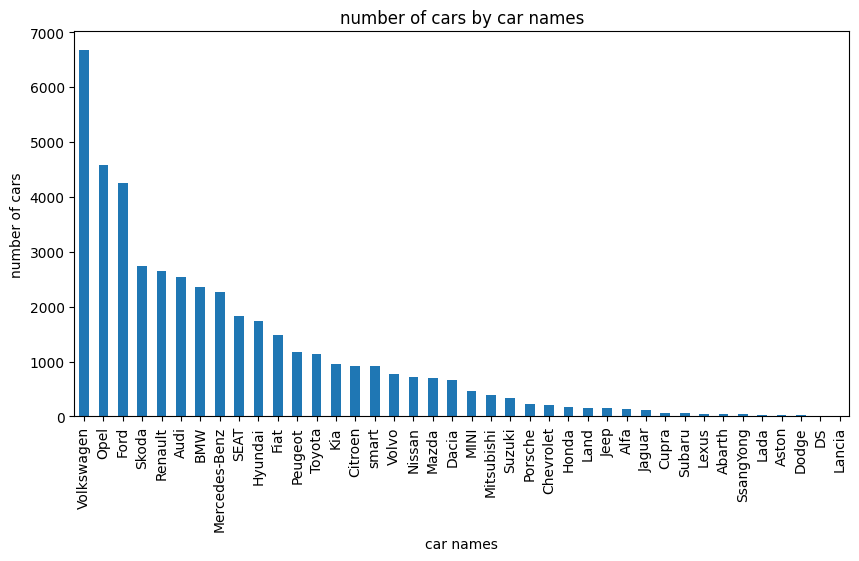

In [55]:
df.make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("number of cars by car names")
plt.ylabel('number of cars')
plt.xlabel('car names')

In [56]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


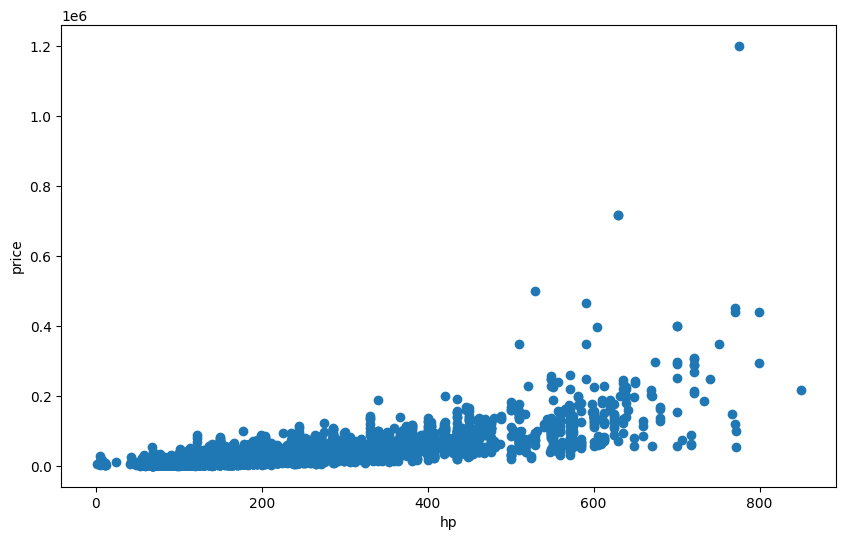

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['hp'], df['price'])
ax.set_xlabel('hp')
ax.set_xlabel('price')
plt.xlabel('hp')
plt.ylabel('price')
plt.show()

In [59]:
df[['hp', 'price']].corr()

,hp,price
hp,1.000000,0.745003
price,0.745003,1.000000


<ipython-input-60-6df70f82c570>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,mileage,price,hp,year
mileage,1.000000,-0.305598,-0.022912,-0.670614
price,-0.305598,1.000000,0.745003,0.411415
hp,-0.022912,0.745003,1.000000,0.181946
year,-0.670614,0.411415,0.181946,1.000000


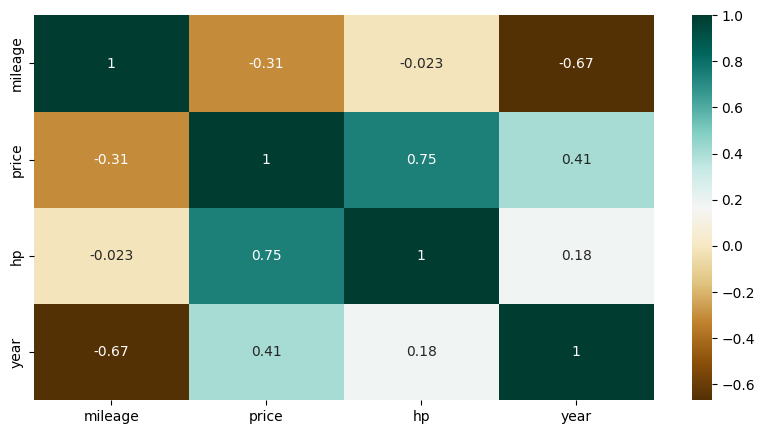

In [60]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

In [62]:
result = pd.pivot_table(data=df, index='gear', columns='fuel', values='price')
print(result)

fuel              -/- (Fuel)           CNG        Diesel      Electric  \
gear                                                                     
Automatic       26014.000000  19566.380952  25952.609516  23203.477564   
Manual           8748.533333  10935.630435  10906.264112  28633.400000   
Semi-automatic           NaN           NaN   7914.142857           NaN   

fuel            Electric/Diesel  Electric/Gasoline  Ethanol      Gasoline  \
gear                                                                        
Automatic          37631.488372       34180.867971      NaN  29954.821169   
Manual             32200.333333       17779.330317   3450.0  10260.233230   
Semi-automatic              NaN                NaN      NaN   8536.025000   

fuel            Hydrogen           LPG        Others  
gear                                                  
Automatic        34990.0  27690.187500  22945.700000  
Manual               NaN   8419.376344  12219.971429  
Semi-automatic       Na

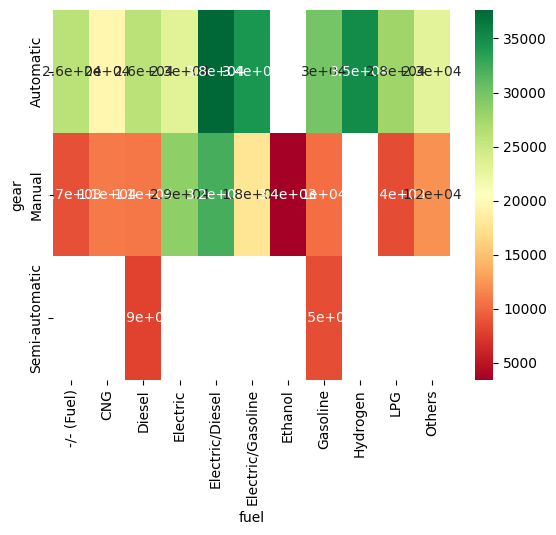

In [64]:
sns.heatmap(result, annot=True, cmap='RdYlGn',)
plt.show()

In [65]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


# simple feature scaing

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['mileage', 'price']])

print(scaled)

[[0.21150002 0.00475475]
 [0.08352001 0.00481899]
 [0.13437001 0.00483817]
 ...
 [0.000495   0.00976393]
 [0.0007533  0.00976393]
 [0.00135    0.00990991]]


# standarization (z-score normalization)

In [69]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(df[['mileage', 'price']])
print(scaled)

[[ 2.61670377 -0.50119677]
 [ 0.3295246  -0.4972372 ]
 [ 1.23828425 -0.49605447]
 ...
 [-1.15424671 -0.19240213]
 [-1.14963053 -0.19240213]
 [-1.13896668 -0.18340312]]


In [70]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [72]:
print('max : ', df['price'].max(), ' min : ', df['price'].min())

max :  1199900  min :  1100


<Axes: >

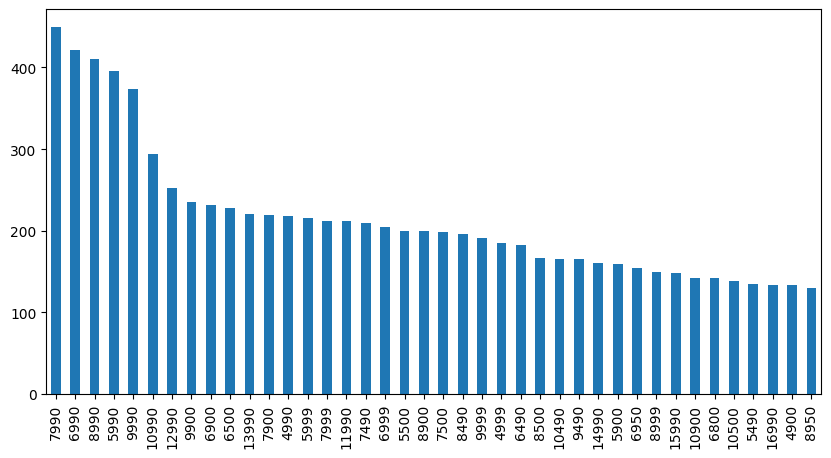

In [73]:
df.price.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

In [78]:
batas_min = df['price'].median() # batas kecil
batas_max = df['price'].max() # batas besar

batas_bin = [0, batas_min, batas_max]
kategori = ['kecil', 'besar']

df['price_binned_1'] = pd.cut(df['price'], bins=batas_bin, labels=kategori)
print(df)

       mileage        make   model               fuel    gear       offerType  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46394       10     Citroen      C1           Gasoline  Manual  Pre-registered   
46396       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46397      550        Fiat     500  Electric/Gasoline  Manual   Demonstration   
46398      837        Fiat   Panda  Electric/Gasoline  Manual   Demonstration   
46399     1500       Skoda   Fabia           Gasoline  Manual   Demonstration   

       price     hp  year p

In [80]:
df.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year,price_binned_1
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021,besar
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021,besar
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021,besar
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021,besar
46399,1500,Skoda,Fabia,Gasoline,Manual,Demonstration,12980,60.0,2021,besar


In [82]:
df.shape[0]/2

21973.5

In [86]:
bins = np.linspace(min(df['price']), max(df['price']), df.shape[0]/2)
print(bins)
# df['price_binned'] = pd.cut(df['price'], bins=bins, labels=kategori, include_lowest=True)
# print(df)

TypeError: ignored